In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aleksandrzelenskiy","key":"f865ee1eba597c11e2a49cbfad376b33"}'}

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list --mine

-rw-r--r-- 1 root root 74 May  7 05:43 kaggle.json
ref                 title        size  lastUpdated          downloadCount  
------------------  -----------  ----  -------------------  -------------  
pan4sf/made-cv-hw1  made_cv_hw1  13GB  2020-04-07 14:42:37            122  
pan4sf/test-points  test_points   8MB  2020-04-11 19:37:54            102  


In [3]:
!kaggle datasets download -d pan4sf/test-points

  0% 0.00/7.77M [00:00<?, ?B/s]
100% 7.77M/7.77M [00:00<00:00, 129MB/s]


In [4]:
!kaggle datasets download -d pan4sf/made-cv-hw1

100% 12.6G/12.6G [05:08<00:00, 28.8MB/s]
100% 12.6G/12.6G [05:08<00:00, 43.9MB/s]


In [5]:
!unzip test-points.zip

Archive:  test-points.zip
  inflating: test_points.csv         


In [6]:
!unzip made-cv-hw1.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/images/fccc035e77798b83f53f88c0e7007f8a.jpg  
  inflating: data/train/images/fccc2bb7b78c080700f0b1775493a98e.jpg  
  inflating: data/train/images/fccc462541f48b11c6ca739f7b87b6af.jpg  
  inflating: data/train/images/fccd066771e33fff6aa3782bad026965.jpg  
  inflating: data/train/images/fccd20b40633c98b2d866b58f7148b34.jpg  
  inflating: data/train/images/fccd83743af81955ac38f3178d20fae5.jpg  
  inflating: data/train/images/fccd8d067036203d0a1ad4fca7c16b6c.jpg  
  inflating: data/train/images/fccd8f3a2377bdcd775f40e5a2a2df2d.jpg  
  inflating: data/train/images/fccd98ba65717c23a5ae98f7c64fd00a.jpg  
  inflating: data/train/images/fccdf0379d790d9c4ede93a3249eae72.jpg  
  inflating: data/train/images/fcce3cc14d9c154874ef5282b6d62775.jpg  
  inflating: data/train/images/fcce4a33a42fbfcd0059c24a09300748.jpg  
  inflating: data/train/images/fcce573f82a568a2815f4f2b827e03ba.jpg  
  inflating: data/train/images/fcce6219

In [0]:
!rm made-cv-hw1.zip # с именем вашего датасета

In [0]:
!rm test-points.zip

In [0]:
import os

import cv2
import numpy as np
import pandas as pd
import torch
from torch.utils import data

import matplotlib.pyplot as plt
import pickle
import cv2

import sys
from argparse import ArgumentParser

import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import tqdm
from torch.nn import functional as fnn
from torchvision import transforms

np.random.seed(1234)
torch.manual_seed(1234)

TRAIN_SIZE = 0.9
NUM_PTS = 971
CROP_SIZE = 128
SUBMISSION_HEADER = "file_name,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,Point_M4_Y,Point_M5_X,Point_M5_Y,Point_M6_X,Point_M6_Y,Point_M7_X,Point_M7_Y,Point_M8_X,Point_M8_Y,Point_M9_X,Point_M9_Y,Point_M10_X,Point_M10_Y,Point_M11_X,Point_M11_Y,Point_M12_X,Point_M12_Y,Point_M13_X,Point_M13_Y,Point_M14_X,Point_M14_Y,Point_M15_X,Point_M15_Y,Point_M16_X,Point_M16_Y,Point_M17_X,Point_M17_Y,Point_M18_X,Point_M18_Y,Point_M19_X,Point_M19_Y,Point_M20_X,Point_M20_Y,Point_M21_X,Point_M21_Y,Point_M22_X,Point_M22_Y,Point_M23_X,Point_M23_Y,Point_M24_X,Point_M24_Y,Point_M25_X,Point_M25_Y,Point_M26_X,Point_M26_Y,Point_M27_X,Point_M27_Y,Point_M28_X,Point_M28_Y,Point_M29_X,Point_M29_Y\n"

In [0]:
PATH_TO_DATA = './data/'
yd = './test_points.csv'

In [11]:
PATH_TO_DATA

'./data/'

In [12]:
pd.read_csv(yd).head()

file_name\tpoint_index_list
c59b2834147079f3e34627f1e75656b1.jpg\t[742 385 583 758 132 634 779 219 750 597 348 547 897 252 802 34  823 787 619 829 777 620 373 866 858 235 463 32  208                        409]
85629eb20fdbbb98d0ee20ed9f3ba233.jpg\t[456 549 339 804 143 241 121 291 835 236 937 672 895 463 85  136 818 722 792 481 879 441 582 864 439 285 876 909 51                         877]
4df0124462ce32e0e8dd5d96a7d6496d.jpg\t[343 907 662 470 551 1   15  144 126 557 276 905 130 556 283 698 740 268 777 123 380 923 765 337 576 836 43  760 519                        387]
fca085b03b834d9d94170e8f1453276e.jpg\t[916 842 715 351 147 808 893 785 591 553 614 388 261 91  341 430 294 463 319 496 933 70  358 740 411 954 291 111 65                         597]
67b598c8621b1f7135dfbc1c47fe2893.jpg\t[818 186 469 337 768 358 887 207 145 685 935 157 551 223 154 202 35  193 401 357 596 184 662 949 838 776 67  344 87                          72]

In [0]:
class ScaleMinSideToSize(object):
    def __init__(self, size=(CROP_SIZE, CROP_SIZE), elem_name='image'):
        self.size = torch.tensor(size, dtype=torch.float)
        self.elem_name = elem_name

    def __call__(self, sample):
        h, w, _ = sample[self.elem_name].shape
        if h > w:
            f = self.size[0] / w
        else:
            f = self.size[1] / h

        sample[self.elem_name] = cv2.resize(sample[self.elem_name], None, fx=f, fy=f, interpolation=cv2.INTER_AREA)
        sample["scale_coef"] = f

        if 'landmarks' in sample:
            landmarks = sample['landmarks'].reshape(-1, 2).float()
            landmarks = landmarks * f
            sample['landmarks'] = landmarks.reshape(-1)

        return sample

In [0]:
class CropCenter(object):
    def __init__(self, size=128, elem_name='image'):
        self.size = size
        self.elem_name = elem_name

    def __call__(self, sample):
        img = sample[self.elem_name]
        h, w, _ = img.shape
        margin_h = (h - self.size) // 2
        margin_w = (w - self.size) // 2
        sample[self.elem_name] = img[margin_h:margin_h + self.size, margin_w:margin_w + self.size]
        sample["crop_margin_x"] = margin_w
        sample["crop_margin_y"] = margin_h

        if 'landmarks' in sample:
            landmarks = sample['landmarks'].reshape(-1, 2)
            landmarks -= torch.tensor((margin_w, margin_h), dtype=landmarks.dtype)[None, :]
            sample['landmarks'] = landmarks.reshape(-1)

        return sample

In [0]:
class TransformByKeys(object):
    def __init__(self, transform, names):
        self.transform = transform
        self.names = set(names)

    def __call__(self, sample):
        for name in self.names:
            if name in sample:
                sample[name] = self.transform(sample[name])

        return sample

In [0]:
class ThousandLandmarksDataset(data.Dataset):
    # def __init__(self, root, transforms, a, b, split="train"):
    def __init__(self, root, transforms, split="train"):
        super(ThousandLandmarksDataset, self).__init__()
        self.root = root
        landmark_file_name = os.path.join(root, 'landmarks.csv') if split is not "test" \
            else os.path.join(root, "test_points.csv")
        images_root = os.path.join(root, "images")
        df = pd.read_csv(landmark_file_name, nrows=350000, delimiter='\t') if split != 'test' else pd.read_csv(yd, delimiter='\t')

        self.landmarks = []
        self.image_names = []

        split_idxs = {"train": range(0, int(TRAIN_SIZE * len(df))),
                      "val": range(int(TRAIN_SIZE * len(df)), len(df)),
                      "test": range(len(df))}

        idxs = split_idxs[split]

        if split in ("train", "val"):
            for row in tqdm.tqdm_notebook(df._values[idxs]):
                self.image_names.append(os.path.join(images_root, row[0]))
                self.landmarks.append(row[1:].astype('int32').reshape((len(row) // 2, 2)))
            self.landmarks = torch.as_tensor(self.landmarks)
        elif split == 'test':
            for row in tqdm.tqdm_notebook(df._values[idxs]):
                self.image_names.append(os.path.join(images_root, row[0]))
            self.landmarks = None
        else:
            raise NotImplementedError(split)

        self.transforms = transforms

    def __getitem__(self, idx):
        sample = {}
        if self.landmarks is not None:
            landmarks = self.landmarks[idx]
            sample["landmarks"] = landmarks

        image = cv2.imread(self.image_names[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        sample["image"] = image

        if self.transforms is not None:
            sample = self.transforms(sample)

        return sample

    def __len__(self):
        return len(self.image_names)

In [0]:
def restore_landmarks(landmarks, f, margins):
    dx, dy = margins
    landmarks[:, 0] += dx
    landmarks[:, 1] += dy
    landmarks /= f
    return landmarks


def restore_landmarks_batch(landmarks, fs, margins_x, margins_y):
    landmarks[:, :, 0] += margins_x[:, None]
    landmarks[:, :, 1] += margins_y[:, None]
    landmarks /= fs[:, None, None]
    return landmarks


def create_submission(path_to_data, test_predictions, path_to_submission_file):
    test_dir = os.path.join(path_to_data, "test")

    output_file = path_to_submission_file
    wf = open(output_file, 'w')
    wf.write(SUBMISSION_HEADER)

    mapping = pd.read_csv(yd, delimiter='\t')

    for i, row in mapping.iterrows():
        file_name = row[0]
        point_index_list = np.array(eval(row[1]))
        points_for_image = test_predictions[i]
        needed_points = points_for_image[point_index_list].astype(np.int)
        wf.write(file_name + ',' + ','.join(map(str, needed_points.reshape(2 * len(point_index_list)))) + '\n')

In [0]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

def parse_arguments():
    parser = ArgumentParser(__doc__)
    parser.add_argument("--name", "-n", help="Experiment name (for saving checkpoints and submits).",
                        default="baseline")
    parser.add_argument("--data", "-d", help="Path to dir with target images & landmarks.", default=None)
    parser.add_argument("--batch-size", "-b", default=512, type=int)  # 512 is OK for resnet18 finetune @ 6Gb of VRAM
    parser.add_argument("--epochs", "-e", default=1, type=int)
    parser.add_argument("--learning-rate", "-lr", default=1e-3, type=float)
    parser.add_argument("--gpu", action="store_true")
    return parser.parse_args()

In [0]:
def train(model, loader, loss_fn, optimizer, device):
    model.train()
    train_loss = []
    for batch in tqdm.tqdm_notebook(loader, total=len(loader), desc="training..."):
        images = batch["image"].to(device)  # B x 3 x CROP_SIZE x CROP_SIZE
        landmarks = batch["landmarks"]  # B x (2 * NUM_PTS)

        pred_landmarks = model(images).cpu()  # B x (2 * NUM_PTS)
        loss = loss_fn(pred_landmarks, landmarks, reduction="mean")
        train_loss.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step(loss)

    return np.mean(train_loss)

def validate(model, loader, loss_fn, device):
    model.eval()
    val_loss = []
    for batch in tqdm.tqdm_notebook(loader, total=len(loader), desc="validation..."):
        images = batch["image"].to(device)
        landmarks = batch["landmarks"]

        with torch.no_grad():
            pred_landmarks = model(images).cpu()
        loss = loss_fn(pred_landmarks, landmarks, reduction="mean")
        val_loss.append(loss.item())

    return np.mean(val_loss)


def predict(model, loader, device):
    model.eval()
    predictions = np.zeros((len(loader.dataset), NUM_PTS, 2))
    for i, batch in enumerate(tqdm.tqdm_notebook(loader, total=len(loader), desc="test prediction...")):
        images = batch["image"].to(device)

        with torch.no_grad():
            pred_landmarks = model(images).cpu()
        pred_landmarks = pred_landmarks.numpy().reshape((len(pred_landmarks), NUM_PTS, 2))  # B x NUM_PTS x 2

        fs = batch["scale_coef"].numpy()  # B
        margins_x = batch["crop_margin_x"].numpy()  # B
        margins_y = batch["crop_margin_y"].numpy()  # B
        prediction = restore_landmarks_batch(pred_landmarks, fs, margins_x, margins_y)  # B x NUM_PTS x 2
        predictions[i * loader.batch_size: (i + 1) * loader.batch_size] = prediction

    return predictions

In [20]:
class Arguments(object):
    def __init__(self, data = None, batch_size = 128, learning_rate = 0.01, epochs = 12, name = "baseline"):
        self.data = data
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.name = 'BL'
        
args = Arguments(data = PATH_TO_DATA, batch_size = 128, learning_rate = 0.01, epochs = 12)

device = torch.device("cuda: 0") if torch.cuda.is_available() else torch.device("cpu")
print (args.data, args.batch_size, args.learning_rate, args.epochs, args.name, device)

./data/ 128 0.01 12 BL cuda:0


In [21]:
# 1. prepare data & models
train_transforms = transforms.Compose([
    ScaleMinSideToSize((CROP_SIZE, CROP_SIZE)),
    CropCenter(CROP_SIZE),
    TransformByKeys(transforms.ToPILImage(), ("image",)),
    TransformByKeys(transforms.ToTensor(), ("image",)),
    TransformByKeys(transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]), ("image",)),
])

print("Reading data...")
train_dataset = ThousandLandmarksDataset(args.data + 'train', train_transforms, split="train")
train_dataloader = data.DataLoader(train_dataset, batch_size=args.batch_size, num_workers=4, pin_memory=True,
                                   shuffle=True, drop_last=True)

val_dataset = ThousandLandmarksDataset(args.data + 'train', train_transforms, split="val")
val_dataloader = data.DataLoader(val_dataset, batch_size=args.batch_size, num_workers=4, pin_memory=True,
                                 shuffle=False, drop_last=False)

Reading data...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
from torch.optim.optimizer import Optimizer, required
import copy
class AdamW(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, warmup = 0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, warmup = warmup)
        super(AdamW, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamW, self).__setstate__(state)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                
                if group['warmup'] > state['step']:
                    scheduled_lr = 1e-8 + state['step'] * group['lr'] / group['warmup']
                else:
                    scheduled_lr = group['lr']

                step_size = scheduled_lr * math.sqrt(bias_correction2) / bias_correction1
                
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * scheduled_lr, p_data_fp32)

                p_data_fp32.addcdiv_(-step_size, exp_avg, denom)

                p.data.copy_(p_data_fp32)

        return loss

In [23]:
print("Creating model...")
model = models.resnet152(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2 * NUM_PTS, bias=True)
model.to(device)

optimizer = AdamW(model.parameters(), lr=args.learning_rate)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

loss_fn = fnn.mse_loss

Creating model...


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [0]:
import math

In [25]:
print("Ready for training...")
best_val_loss = np.inf
for epoch in range(args.epochs):
    if (epoch < 3):
      optimizer = AdamW(model.parameters(), lr=0.01)
    if (epoch < 5):
      optimizer = AdamW(model.parameters(), lr=0.001)
    if (epoch < 8):
      optimizer = AdamW(model.parameters(), lr=0.0001)
    if (epoch < 10):
      optimizer = AdamW(model.parameters(), lr=0.00005)
    else:
      optimizer = AdamW(model.parameters(), lr=0.00001)
    train_loss = train(model, train_dataloader, loss_fn, optimizer, device=device)
    val_loss = validate(model, val_dataloader, loss_fn, device=device)
    print("Epoch #{:2}:\ttrain loss: {:5.2}\tval loss: {:5.2}".format(epoch, train_loss, val_loss))
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        with open(f"{args.name}_best.pth", "wb") as fp:
            torch.save(model.state_dict(), fp)

Ready for training...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Epoch # 0:	train loss: 5.7e+02	val loss: 2.4e+01



Epoch # 1:	train loss:   6.8	val loss:   3.1



Epoch # 2:	train loss:   2.9	val loss:   2.4



Epoch # 3:	train loss:   2.3	val loss:   2.1



Epoch # 4:	train loss:   2.0	val loss:   1.9



Epoch # 5:	train loss:   1.8	val loss:   2.0



Epoch # 6:	train loss:   1.6	val loss:   1.9



Epoch # 7:	train loss:   1.4	val loss:   1.7



Epoch # 8:	train loss:   1.2	val loss:   1.7



Epoch # 9:	train loss:   1.1	val loss:   1.6



Epoch #10:	train loss:  0.93	val loss:   1.5



Epoch #11:	train loss:  0.86	val loss:   1.5


In [27]:
# 3. predict
test_dataset = ThousandLandmarksDataset(os.path.join(args.data, 'test'), train_transforms, split="test")
test_dataloader = data.DataLoader(test_dataset, batch_size=args.batch_size, num_workers=4, pin_memory=True,
                                  shuffle=False, drop_last=False)

with open(f"{args.name}_best.pth", "rb") as fp:
    best_state_dict = torch.load(fp, map_location="cpu")
    model.load_state_dict(best_state_dict)

test_predictions = predict(model, test_dataloader, device)
with open(f"{args.name}_test_predictions.pkl", "wb") as fp:
    pickle.dump({"image_names": test_dataset.image_names,
                 "landmarks": test_predictions}, fp)

create_submission(args.data, test_predictions, f"{args.name}_submit.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import pandas as pd
np.random.seed(1234)

In [0]:
TEST_PREDICTIONS_FILENAME = "./BL_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [0]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [0]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 99819
Landmarks shape: (99819, 971, 2)


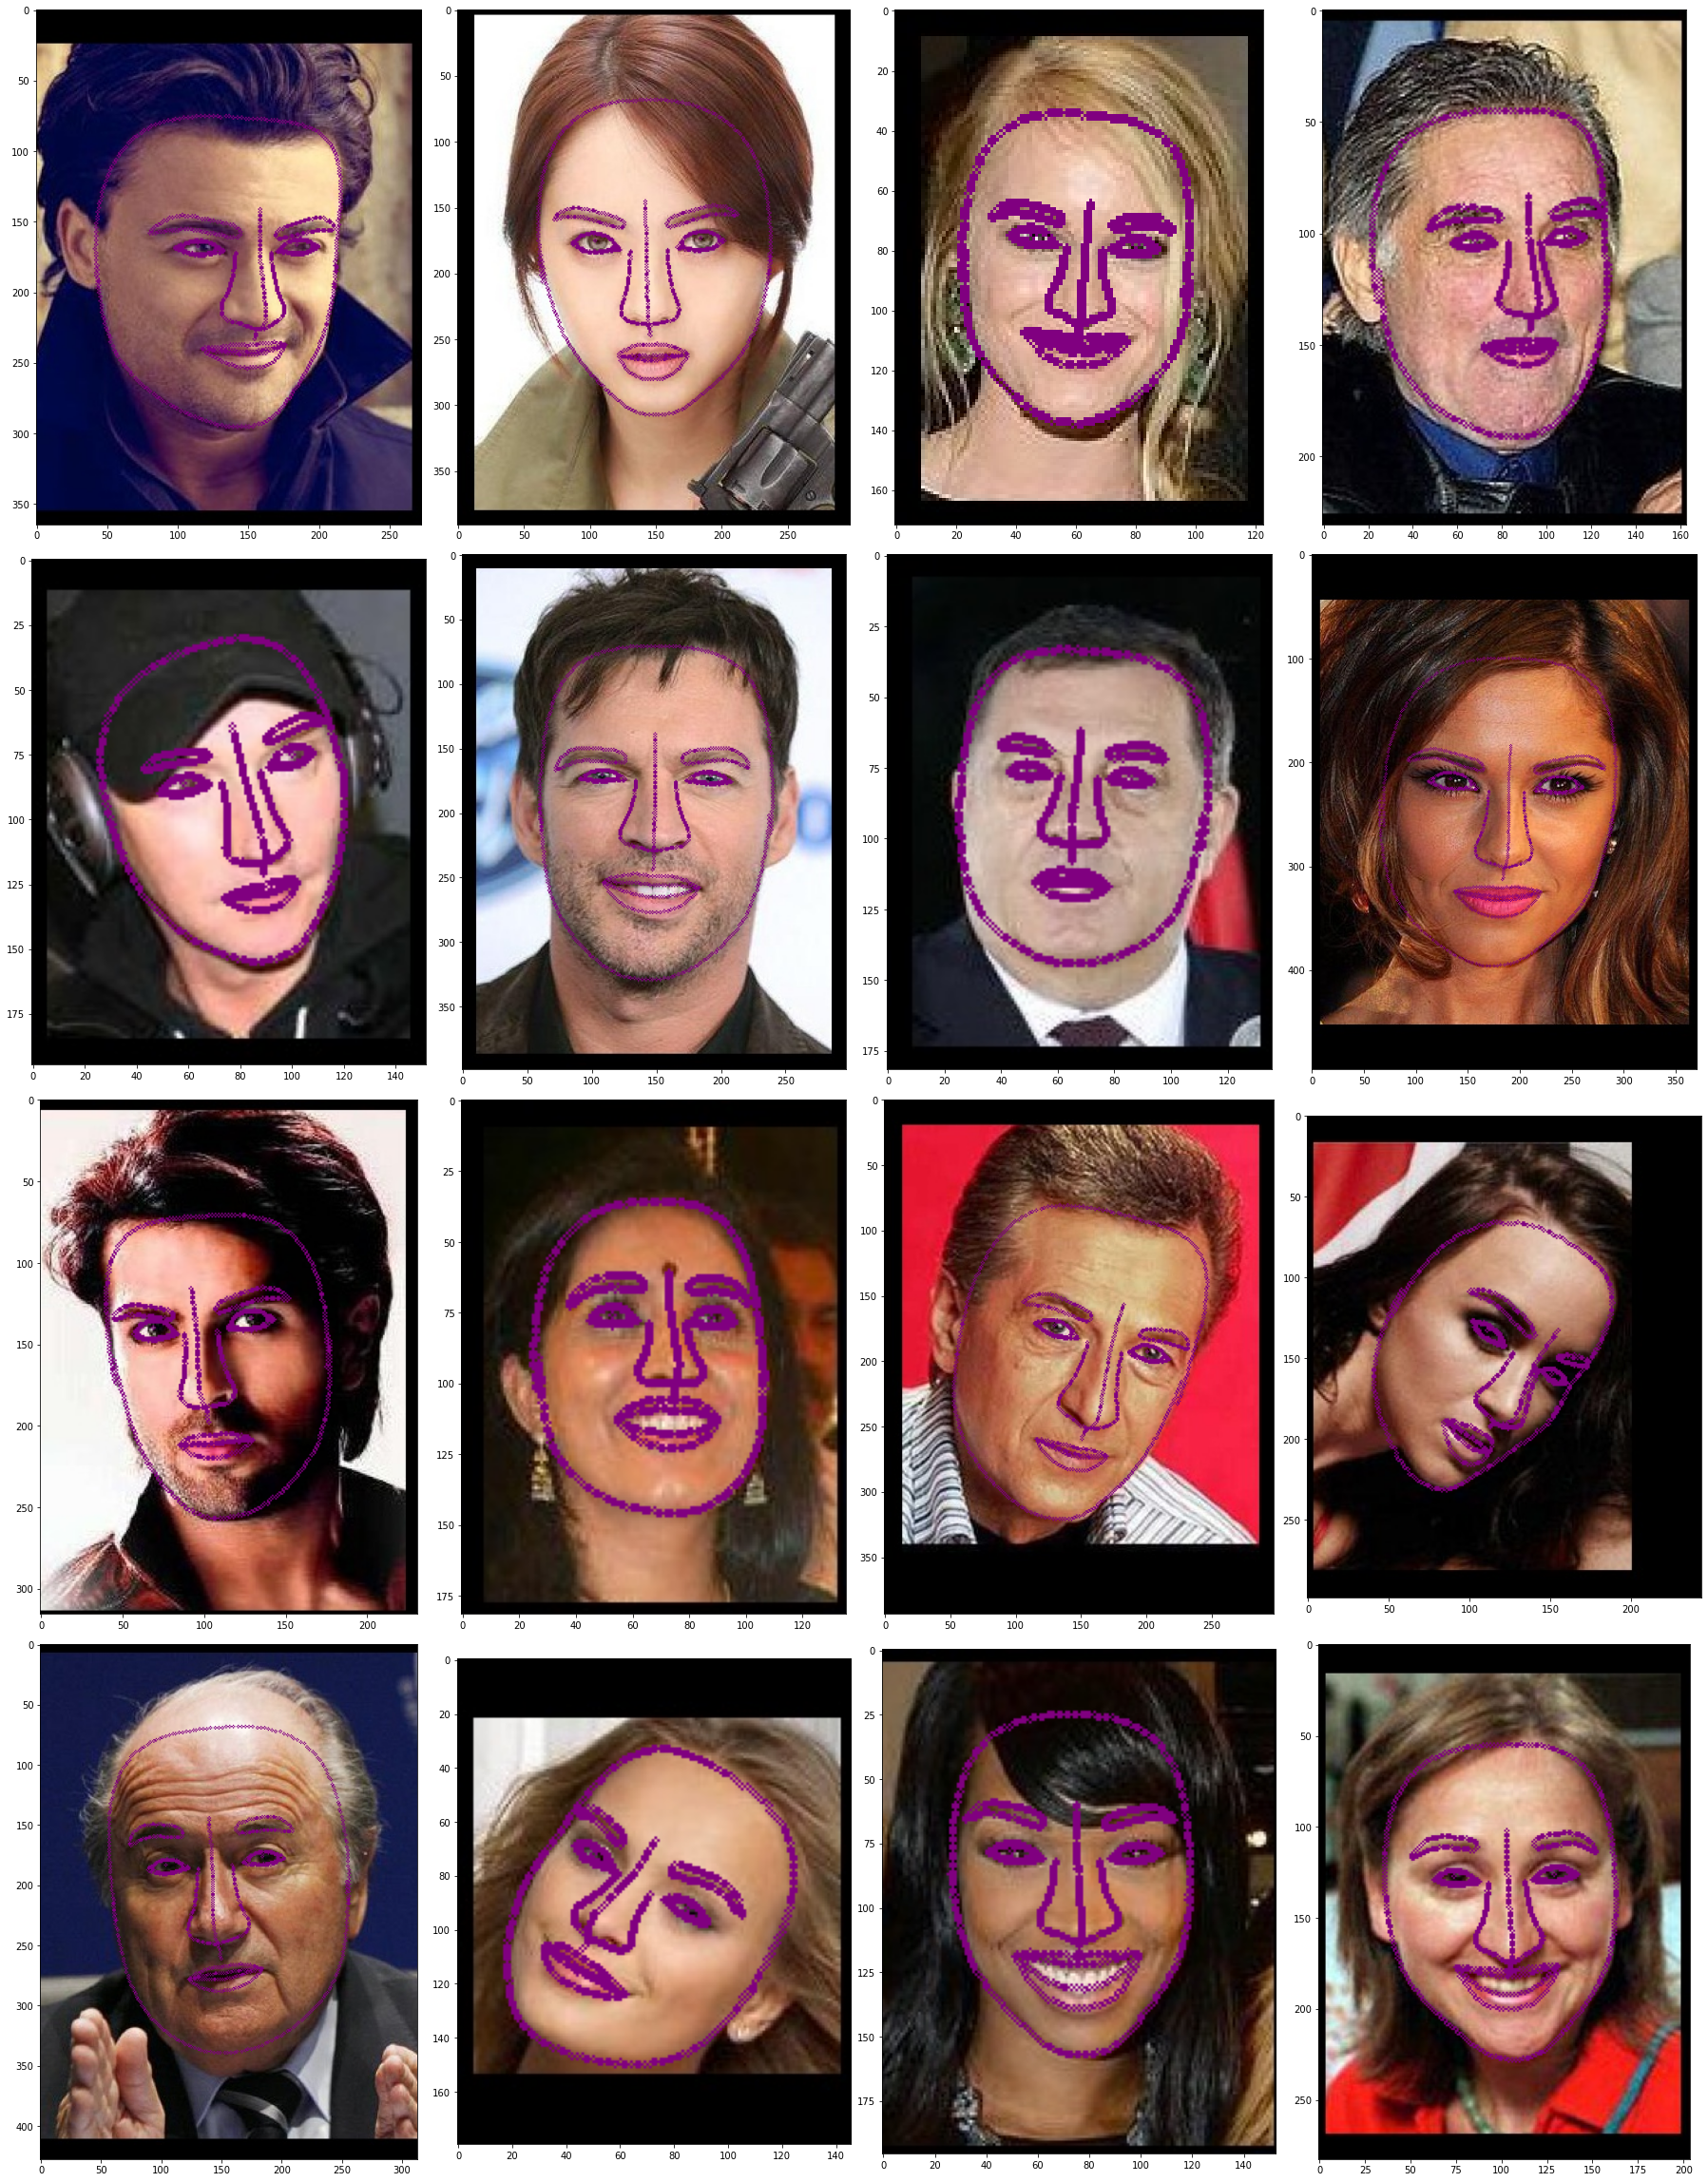

In [0]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread(image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()